# Lending Club Case Study

## Objective

Minimize Risk to lenders while identifying right loan application for borrowers

# Problem Definition

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

In [ ]:
# This is code for solving Lending Club Case Study
# Step to be followed as below - 
    # Analysis and understanding the data
    # Check for nulls/missing data 
    # Remove irrelavant rows/columns
    # Convert Datatype as appropriate
    # Perform EDA (Univariate, Segmented and Bivariate analysis) on appropriate columns
    # Analyse the pattern, relationship between variables
    # Conclude

In [3]:
# Importing all libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set float display
pd.options.display.float_format = '{:.2f}'.format 

# To deal with regular expressions
import re

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Read CSV File
loan = pd.read_csv('/Users/jyotirmoyghosh/Downloads/loan.csv')

In [9]:
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Data Cleaning

In [10]:
# Remove duplicates
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

#No dupes in dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [11]:
# Check for missing row values
print(loan.isnull().all(axis=1).sum())

0


In [12]:
# Check for missing Column values
print(loan.isnull().all(axis=0).sum())

# There are 54 columns with missing values

54


In [13]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
# Drop columns with all null values
loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 

In [15]:
# Drop additional columns with nulls
columns_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan.drop(labels = columns_drop_list1, axis =1, inplace=True)
columns_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan.drop(labels = columns_drop_list2, axis =1, inplace=True)
columns_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens"]
loan.drop(labels = columns_drop_list3, axis =1, inplace=True)

In [16]:
loan.shape

(39717, 45)

In [17]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0.00


In [75]:
print(loan.nunique().sort_values(ascending=True))

collections_12_mths_ex_med        1
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              4
int_rate_cats                     4
pub_rec                           5
annual_inc_cats                   5
loan_amnt_cats                    5
year                              5
dti_cats                          5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
month                            12
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        371
earliest_cr_line                526
loan_amnt                   

In [18]:
# Clean up emp_length col to remove + & years/year
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,1,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0.00


In [19]:
# Clean up pub_rec_bankruptcies
print(loan.pub_rec_bankruptcies.isnull().sum())

697


In [20]:
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan.pub_rec_bankruptcies.isnull().sum())

0


In [21]:
# Remove % from int_rate
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

In [22]:
# Remove % from revol_util
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [23]:
# Group amount cols together to find correlation
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [24]:
# Introspecting loan_satus column
(loan.loan_status.value_counts()*100)/len(loan)

# majority of loans are paid off

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [25]:
# Introspecting purpose of loan column
(loan.purpose.value_counts()*100)/len(loan)

# Majority of the loans relate to debt_consolidation and credit_card

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [26]:
# Derive new columns month and year
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0.00,2011,12


# Univariate Analysis

In [27]:
loan['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<Axes: >

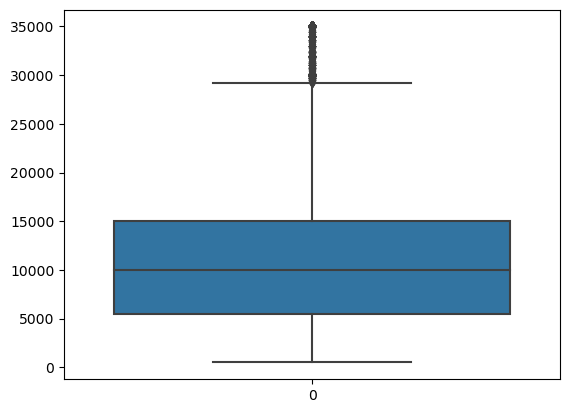

In [28]:
sns.boxplot(loan.loan_amnt)

# Majority of the loans are between 5 - 15K with few outliers

<Axes: >

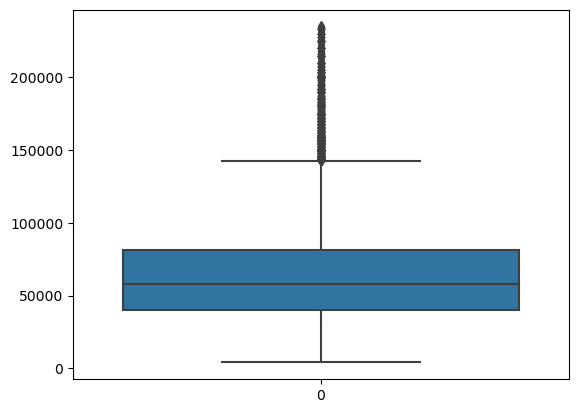

In [33]:
sns.boxplot(loan.annual_inc)

# Average annual_inc is 64K

In [31]:
loan['annual_inc'].describe()

#Clearly see outlier here that needs to be removed

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

In [32]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
loan['annual_inc'].describe()

count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64

<Axes: >

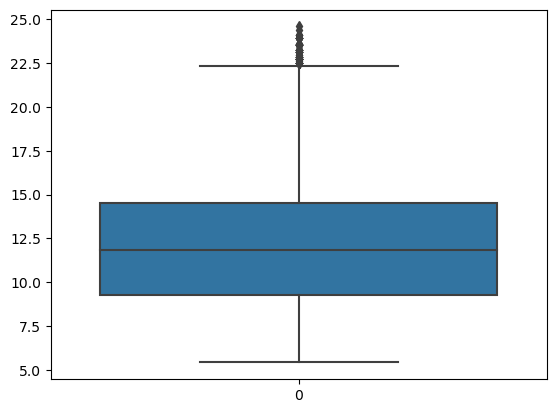

In [35]:
sns.boxplot(loan.int_rate)

# Average int_rate is 12 with outlier beyond 75% percentile

In [49]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0.00,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0.00,2011,12


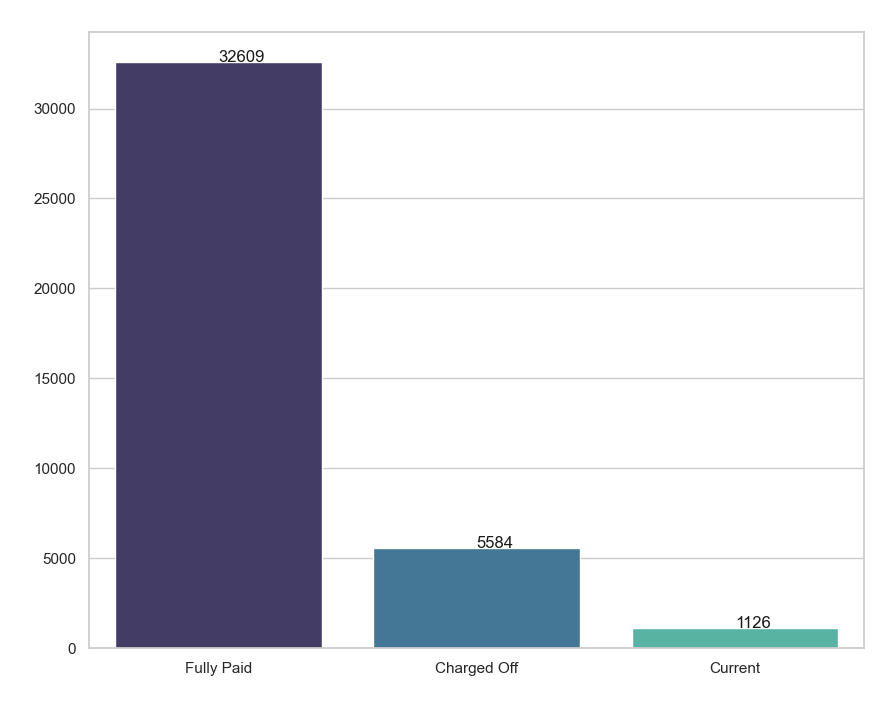

In [102]:
# let's look at loan status

plt.figure(figsize=(10,8),facecolor='w')
sns.set_style("whitegrid")
ax = sns.countplot(x="loan_status",data=loan,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')
    
# Roughly 14% loans were defaulted

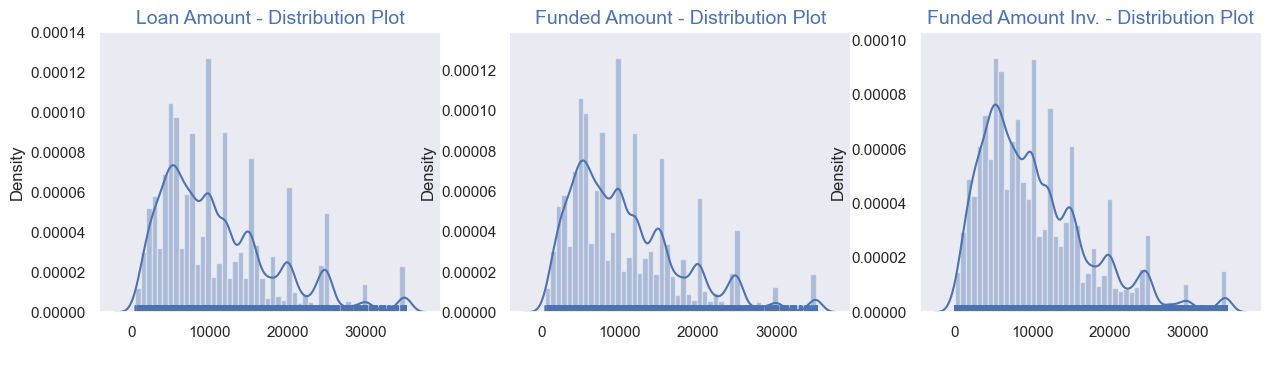

In [110]:
# let's see distribution of the max correlated variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# Loan Amount
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# Funded Amount
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# Funded Amount Inv
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

Text(0.5, 0, 'Annual Income')

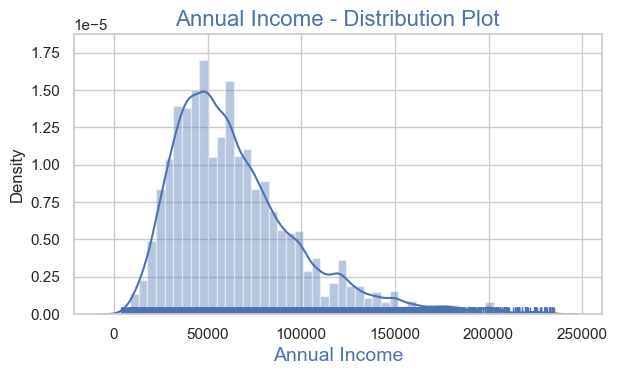

In [123]:
# let's look at annual income

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')

# Most of the income range is between 40 - 80K

Text(0.5, 0, 'Loan Amount')

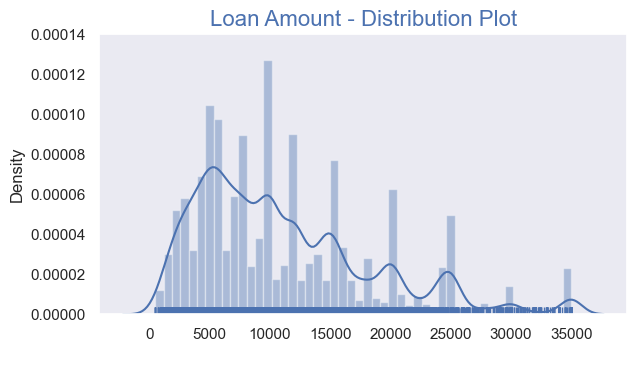

In [125]:
# Let's consider loan amount for now

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')


# most of the loans are in the range of 5 to 15K

Text(0.5, 0, 'Interest Rate')

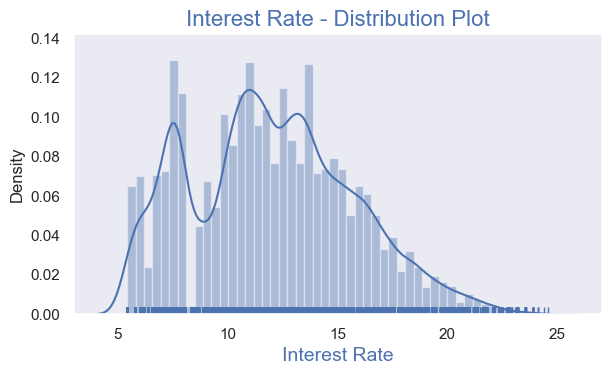

In [126]:
# let's look at interest rate

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')

# Most interest rates hover between 10 & 15

# Find Correlation between variables - Bivariate

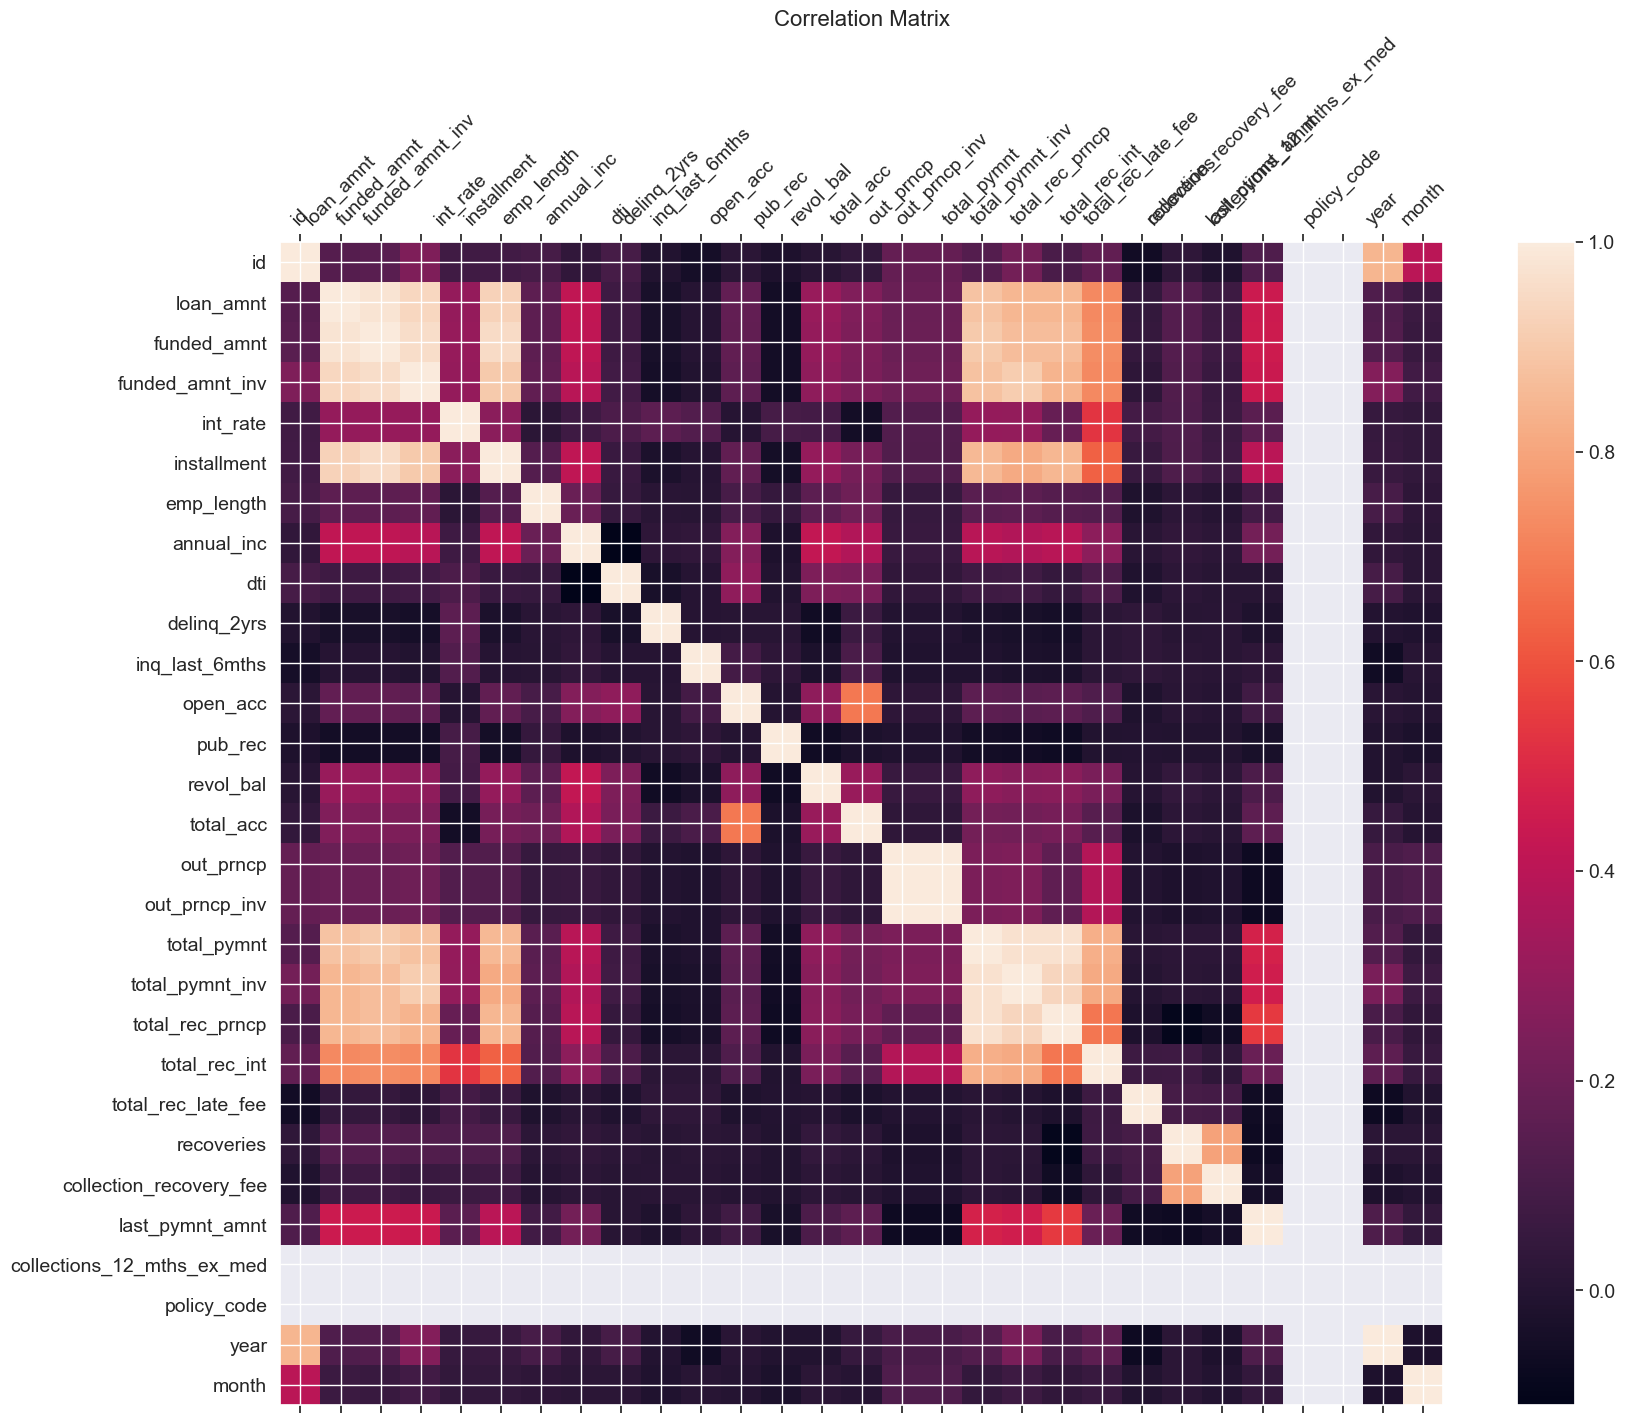

In [51]:
f = plt.figure(figsize=(19, 15))
plt.matshow(loan.corr(), fignum=f.number)
plt.xticks(range(loan.select_dtypes(['number']).shape[1]), loan.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(loan.select_dtypes(['number']).shape[1]), loan.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Observations
# 1. Loan amount, funded_amnt_inv, funding amount are strongly correlated.
# 2. Annual income with DTI is negatively correalted.
# 3. Annual income is low DTI is high & vice versa.
# 4. positive correlation between annual income and employment years.

In [52]:
#Dropping additional column

columns_drop_list4 = ["application_type","policy_code","initial_list_status","installment","pymnt_plan"]
loan.drop(labels = columns_drop_list4, axis =1, inplace=True)
print(loan.shape)
loan.isnull().sum()

(39319, 42)


id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

In [53]:
# Derived cols - Categorize into buckets

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [54]:
print(loan.shape)
loan.head(1)

(39319, 46)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,171.62,May-16,0.00,0.00,2011,12,0-7000,20000-40000,10-13,NaN


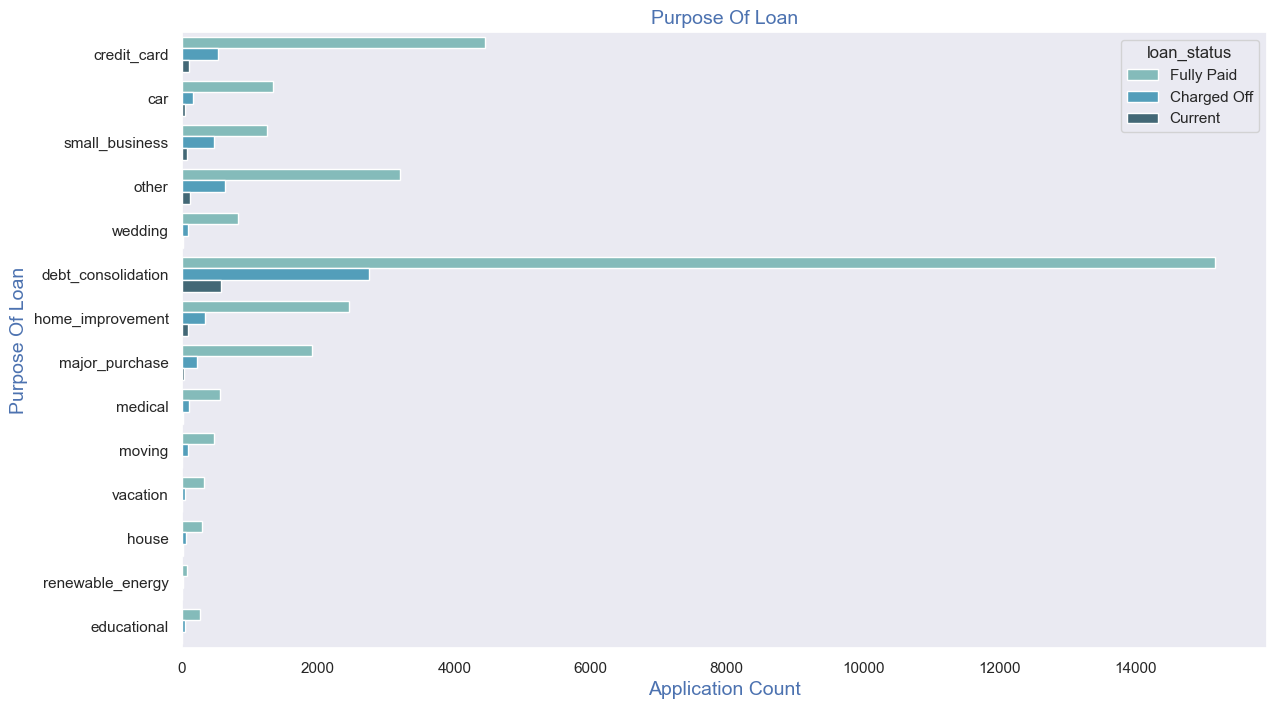

In [122]:
# Purpose of loan vs defaulter

plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Application Count',fontsize=14,color = 'b')      
plt.show()

# Majority of loans was for debt consolidation and credit card

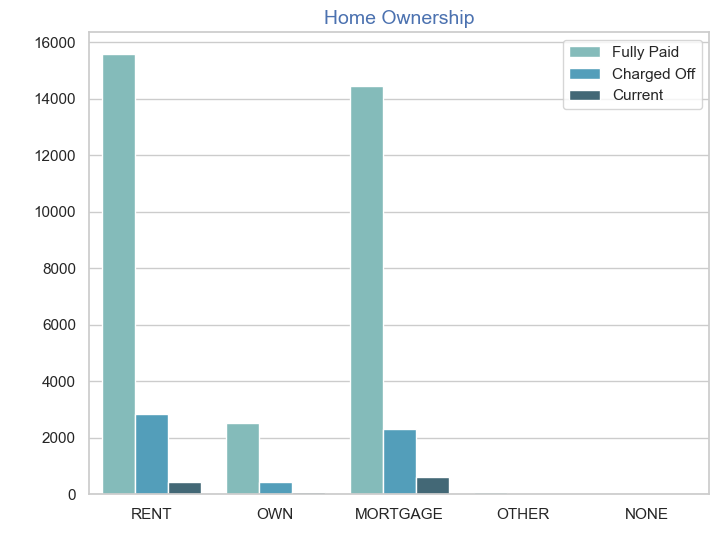

In [116]:
# Home Ownership vs defaulter

plt.figure(figsize=(8,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Majority of the loan applicants are living in rented or mortgazed thier home

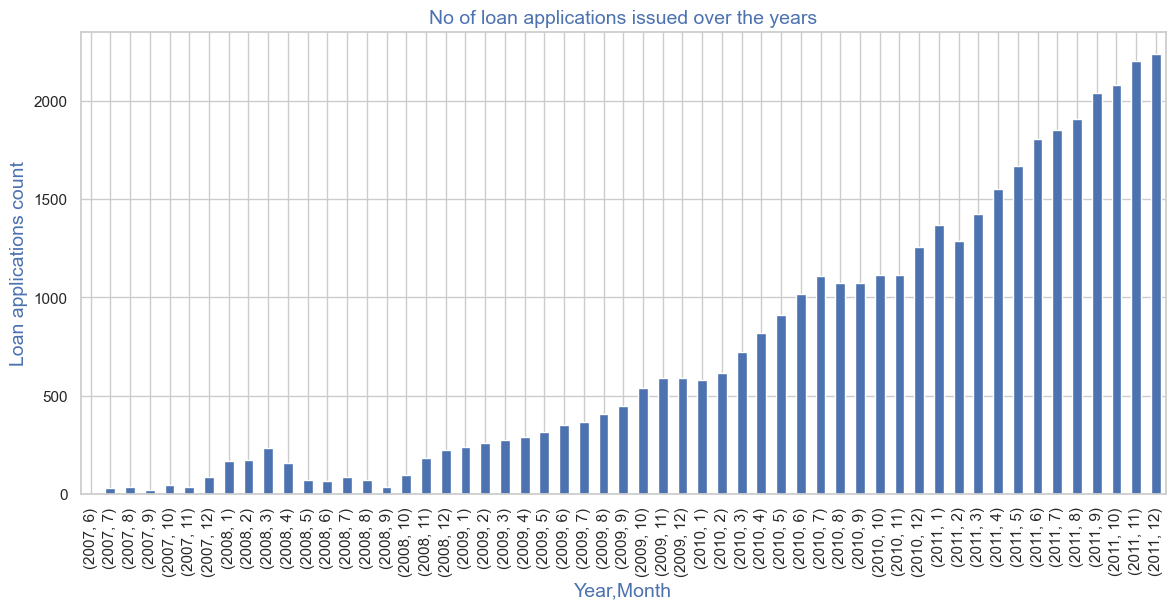

In [120]:
# Loans approved over year/month

plt.figure(figsize=(14,6),facecolor='w')
loan.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='b')
plt.xlabel('Year,Month',fontsize=14,color = 'b')      
plt.title("No of loan applications issued over the years",fontsize=14,color='b')
plt.show()

# Number of loans appplications increasing year on year

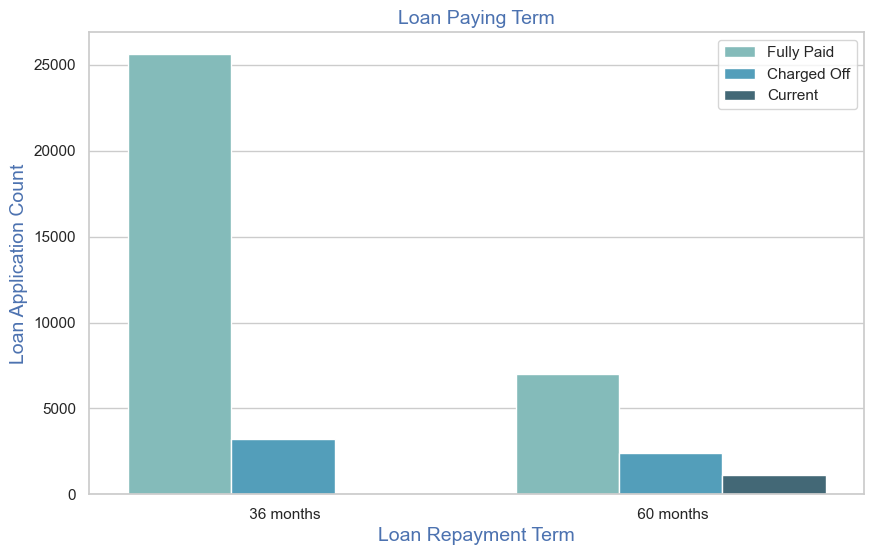

In [119]:
# Loan payment term vs default

plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Longer tenure loan tends to be defaulted more

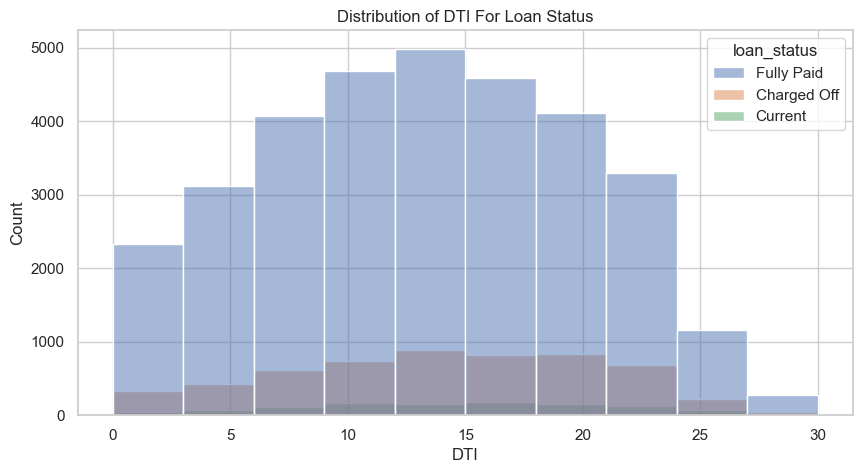

In [78]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

# DTI ratio between 10-15 has max defaults

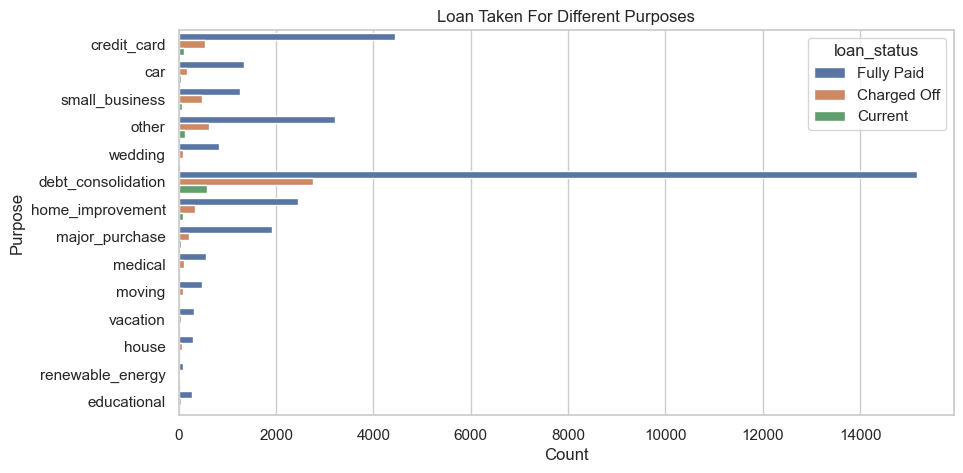

In [81]:
# Puprose based on loan status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

# Debt consolidation is the highest category of loans with max defaulters also

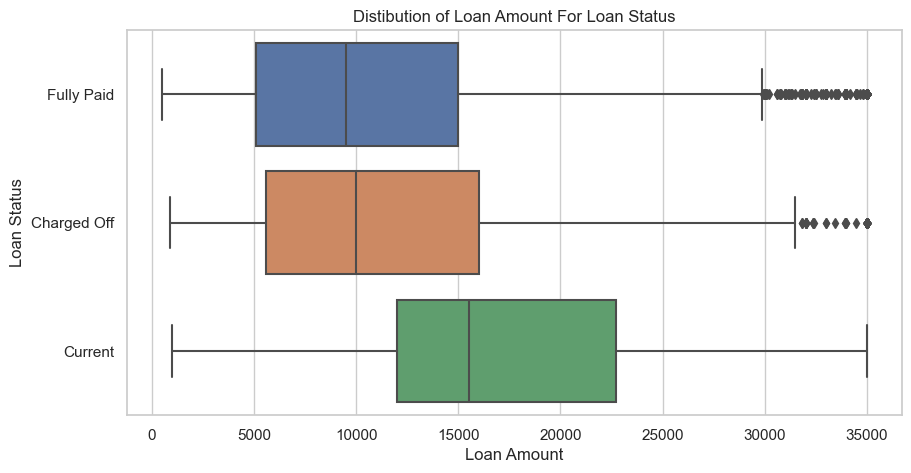

In [79]:
# loan amount based on loan status

plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

# 

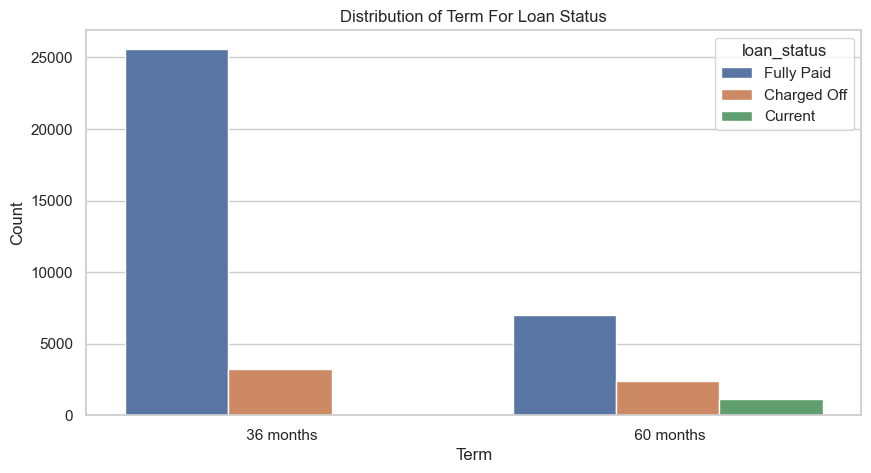

In [82]:
# Term based on loan status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

# 60 months loan term has higher chance of default

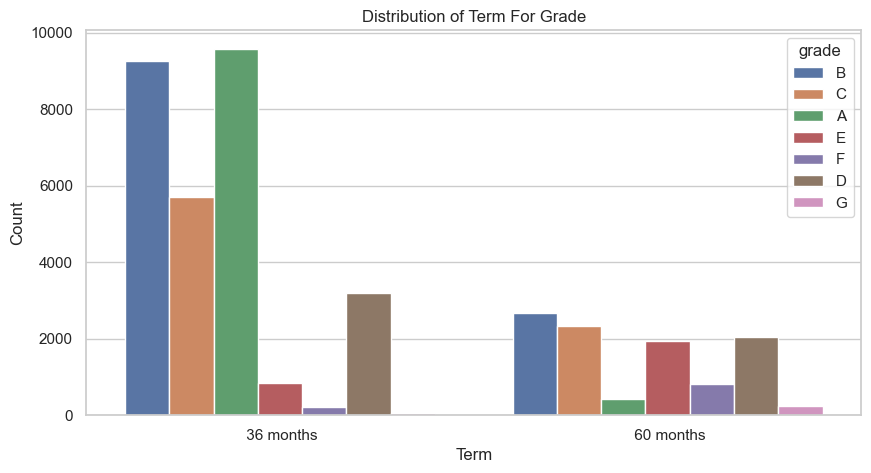

In [83]:
# Term based on grade

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

# 36 months - A, B grades; 60 months - B,C & D

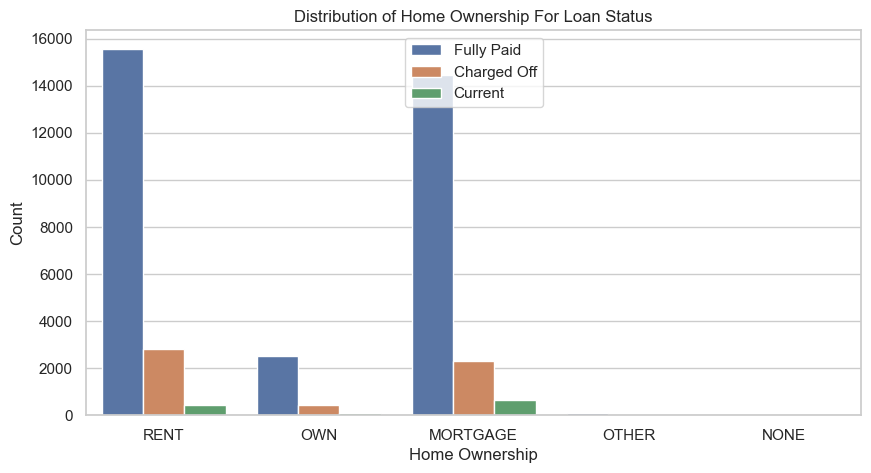

In [84]:
# home ownership based on loan status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

# Loan defaults less for owned house
# Loan defaults more on rent and mortgage

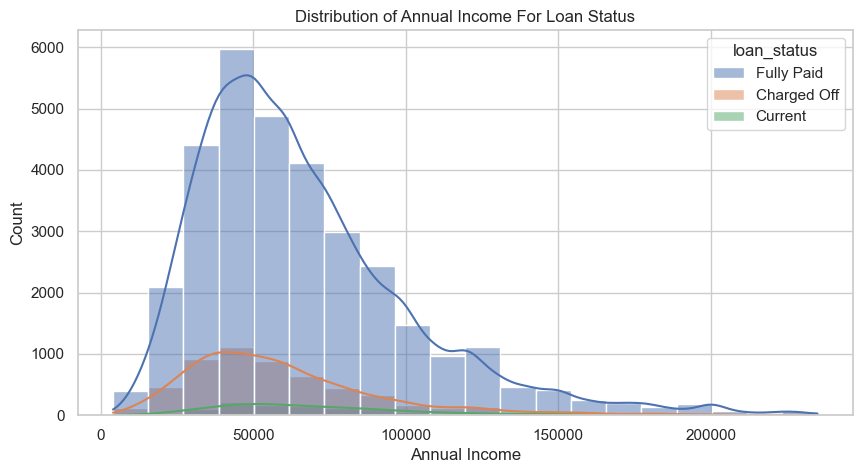

In [85]:
# Annual income based on loan status

plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

# <50K inconme tends to default more

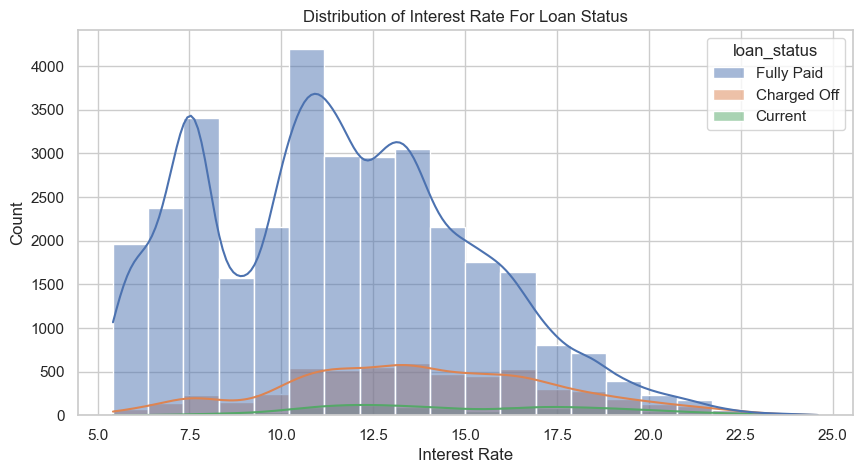

In [86]:
# interest amount based on loan status

plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

# Max defaults hover between 10 to 17

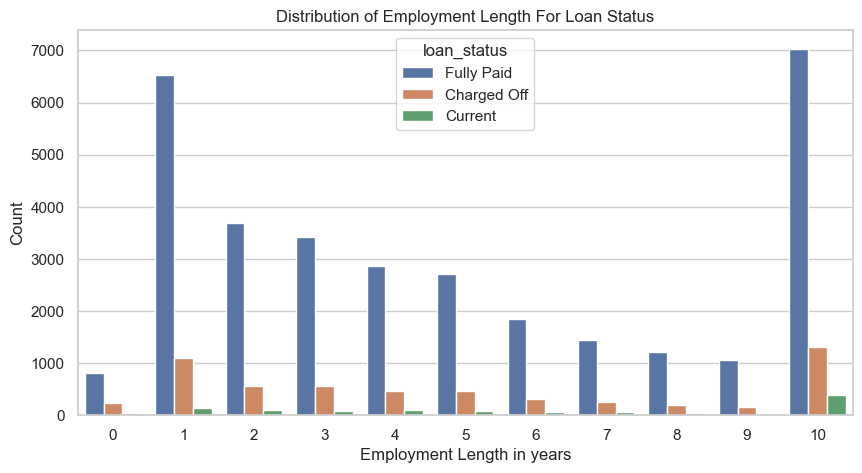

In [87]:
# Employee length based on loan status

plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

# 10+ years are likely to default more

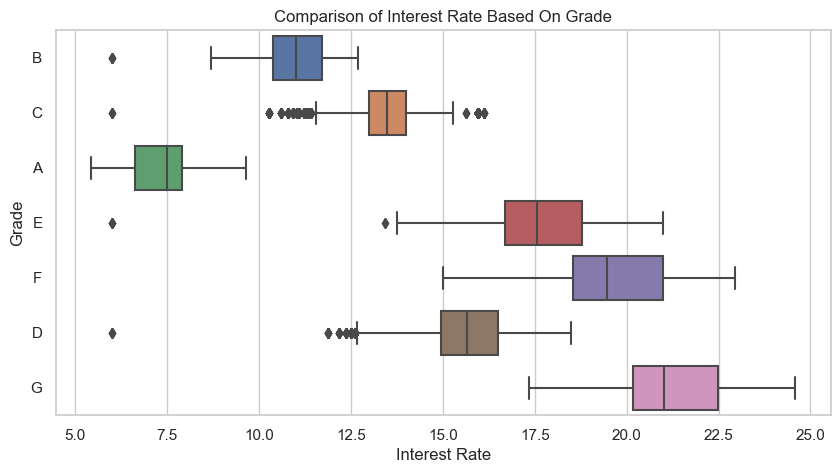

In [88]:
# Interest rate vs Grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

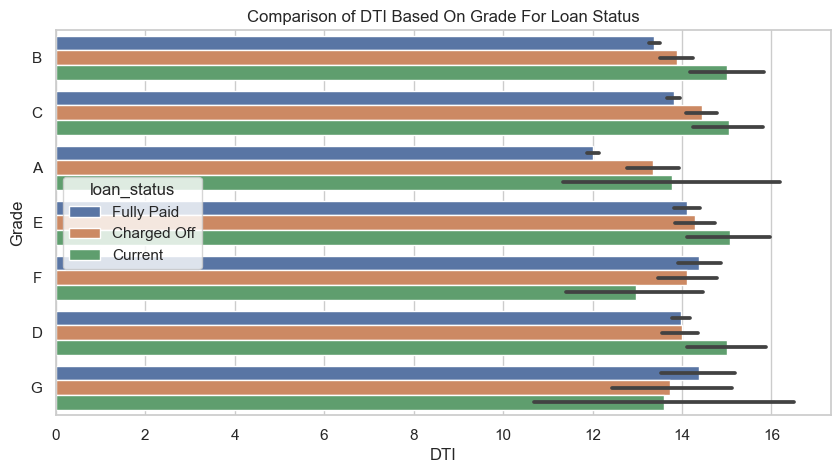

In [89]:
# DTI over grade for loan status

plt.figure(figsize=(10,5))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

# Higher grade has lower default

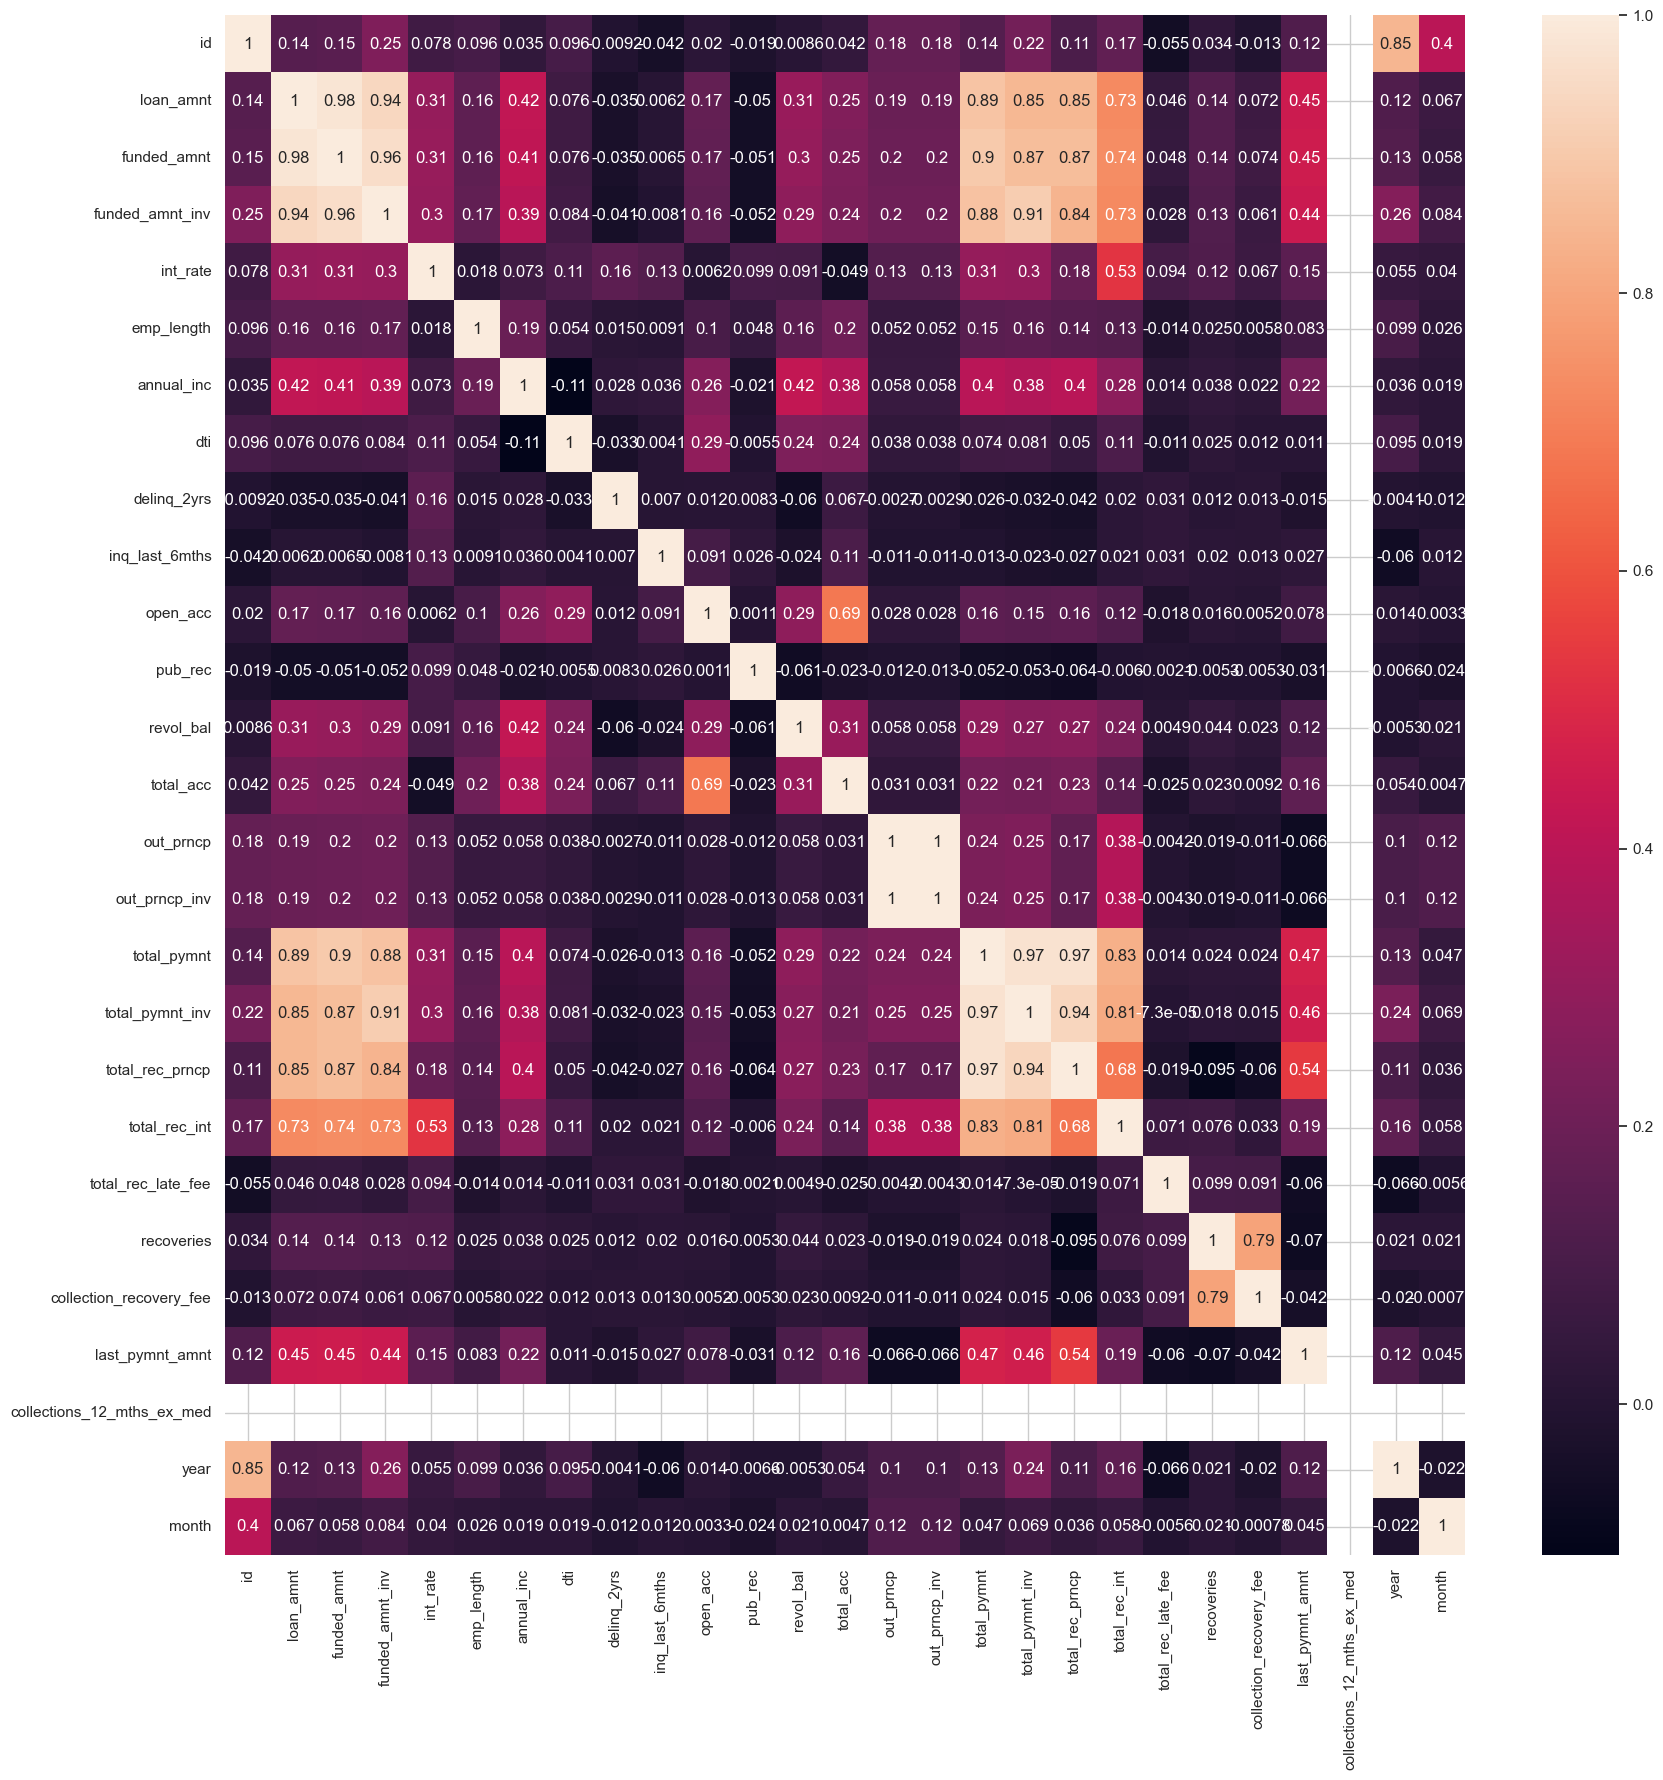

In [95]:
# Annual income to public record bankruptcy over loan status

plt.figure(figsize=(20,20))
sns.heatmap(loan.corr(),annot=True)
plt.show()

# Observations

## Univariate Analysis

1. Majority of the loans are for debt consolidation followed by credit card
2. Majority of the loans belong to grade A & B
3. Majority of borrowers have 10+ years tenure
4. Majority of interest rate hovers between 10 & 15
5. Majority of the borrowers don't own a property
6. Majority of the loans have 36 months tenure
7. Loan default % is very less compared to full paid

# Observations

## Segmented Univariate Analysis

1. Less than 50K annual income has more probablity of defaulting
2. 10+ years of experience are more likely to default
3. Larger loan amount has higher chance of defaulting
4. 36 month term majorily fall in grade A and B loans whereas 60 month term mostly fall in grade B, C and D loans.
5. Majority of the defaulters stay on rent of have mortgage
6. 60 month loan tenure has higher defaulting probability

# Observations

## Bivariate Analysis

1. Grade represent risk factor and hence we can say interst rate increases with the risk.
2. Grade A having lowest risk also has lowest DTI ratio
3. The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

# High Impact Variables

1. Annual Income
2. DTI Ratio
3. Home Ownership
4. Public Bankruptcies
5. Grades
6. Loan Tenure
7. Employee Tenure